
**Tzuf Feldon - 314954801**
**Yahav Simon - 209339613**

https://www.kaggle.com/yahavsimon

**In this notebook, we will explore the Titanic dataset, perform data preprocessing, train a Logistic Regression model, and evaluate its performance. The goal is to accurately classify passengers as survived or not.**


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import neural_network
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

**We load the training and test datasets provided for the Titanic challenge.**

In [2]:
original_train = pd.read_csv("/kaggle/input/titanic7/train.csv")

test = pd.read_csv("/kaggle/input/titanic7/test.csv")

**We analyze the dataset to understand its structure and feature distributions.**

In [3]:
original_train.shape

(891, 12)

In [4]:
original_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Here we analyze the key features of the dataset and their impact on survival.**

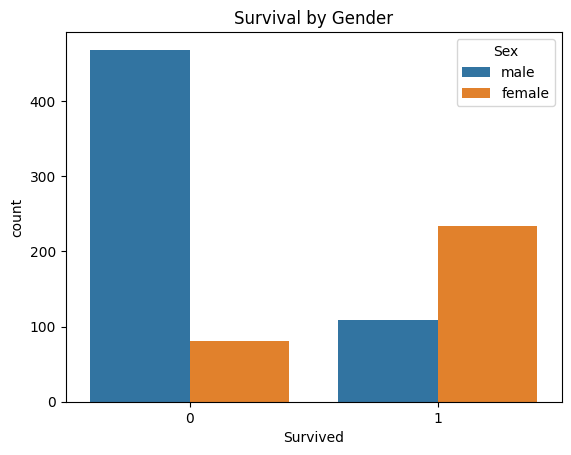

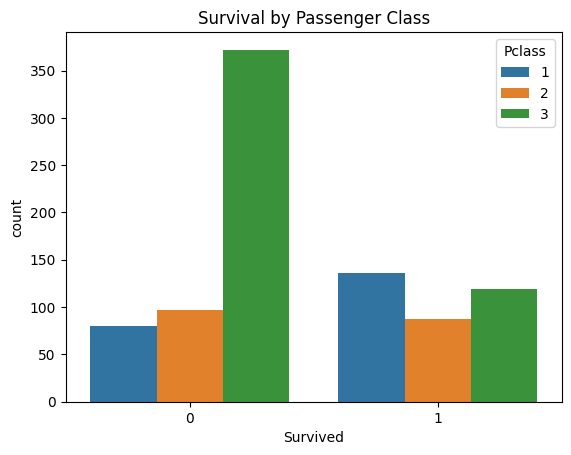

In [5]:

sns.countplot(x='Survived', hue='Sex', data=original_train)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=original_train)
plt.title('Survival by Passenger Class')
plt.show()


## Our Predictions
Based on initial observations, we predict the following trends in survival:

- **Sex**: Females are more likely to survive.
- **SibSp/Parch**: People traveling alone are more likely to survive.
- **Age**: Young children are more likely to survive.
- **Pclass**: People of higher socioeconomic class are more likely to survive.
vive.

**Creating a column indicating whether a cabin is assigned or not**

In [6]:
original_train['Has_Cabin'] = original_train['Cabin'].notnull().astype(int)
test['Has_Cabin'] = test['Cabin'].notnull().astype(int)


**Removing Irrelevant Columns: PassengerId, Name, and Ticket**

In [7]:
original_train = original_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

**Check Missing Values in Each Column of the Dataset**

In [8]:
print(original_train.isnull().sum())
print(test.isnull().sum())

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
Has_Cabin      0
dtype: int64
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Embarked      0
Has_Cabin     0
dtype: int64


## Data Preprocessing
We handle missing values, standardize numerical columns, convert categorical data to numeric, and drop irrelevant columns.



In [9]:
original_train['Age'].fillna(original_train['Age'].median(), inplace=True)
test['Age'].fillna(original_train['Age'].median(), inplace=True)

original_train['Fare'].fillna(original_train['Fare'].median(), inplace=True)
test['Fare'].fillna(original_train['Fare'].median(), inplace=True)

original_train['Embarked'].fillna(original_train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(original_train['Embarked'].mode()[0], inplace=True)



**Convert categorical columns to numeric values**

In [10]:
original_train['Sex'] = original_train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

embark_mapping = {'C': 0, 'Q': 1, 'S': 2}
original_train['Embarked'] = original_train['Embarked'].map(embark_mapping)
test['Embarked'] = test['Embarked'].map(embark_mapping)

**Standardization of numerical data**

In [11]:
scaler = StandardScaler()

original_train[['Age', 'Fare']] = scaler.fit_transform(original_train[['Age', 'Fare']])
test[['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])

**Checking for Missing Values in Train and Test Datasets**

In [12]:
print(original_train.isnull().sum())
print(test.isnull().sum())

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Has_Cabin    0
dtype: int64
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Has_Cabin    0
dtype: int64


**Splitting the Original Train Data into Temporary Train and Validation Sets**

In [13]:
temporary_train, validation = train_test_split(original_train, test_size=0.2, random_state=42)

print("Temporary Train Size:", temporary_train.shape)
print("Validation Size:", validation.shape)

Temporary Train Size: (712, 9)
Validation Size: (179, 9)


In [14]:
label_column = 'Survived'

X_temporary_train = temporary_train.drop(columns=[label_column])
y_temporary_train = temporary_train[label_column]

X_validation = validation.drop(columns=[label_column])
y_validation = validation[label_column]


In [15]:

print(X_temporary_train.head())

print(X_temporary_train.info())

print(X_temporary_train.describe())

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Has_Cabin
331       1    0  1.240235      0      0 -0.074583         2          1
733       2    0 -0.488887      0      0 -0.386671         2          0
382       3    0  0.202762      0      0 -0.488854         2          0
704       3    0 -0.258337      1      0 -0.490280         2          0
813       3    1 -1.795334      4      2 -0.018709         2          0
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     712 non-null    int64  
 1   Sex        712 non-null    int64  
 2   Age        712 non-null    float64
 3   SibSp      712 non-null    int64  
 4   Parch      712 non-null    int64  
 5   Fare       712 non-null    float64
 6   Embarked   712 non-null    int64  
 7   Has_Cabin  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB
None
           

## Survival Distribution in Temporary Train Set
This bar chart shows the distribution of survivors (`Survived = 1`) and non-survivors (`Survived = 0`) in the temporary training dataset.


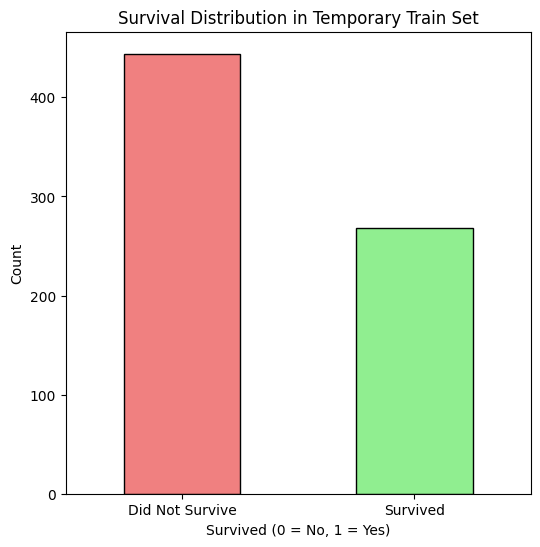

In [16]:

survived_counts = y_temporary_train.value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
survived_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Survival Distribution in Temporary Train Set')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'], rotation=0)
plt.show()


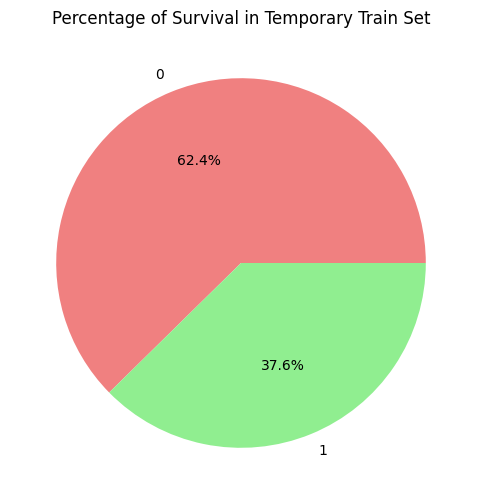

In [17]:

plt.figure(figsize=(6, 6))
survived_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of Survival in Temporary Train Set')
plt.ylabel('')  
plt.show()


## Model Evaluation
Shows accuracy, confusion matrix, and classification report for the validation set.


Accuracy on Validation Set: 0.8212290502793296


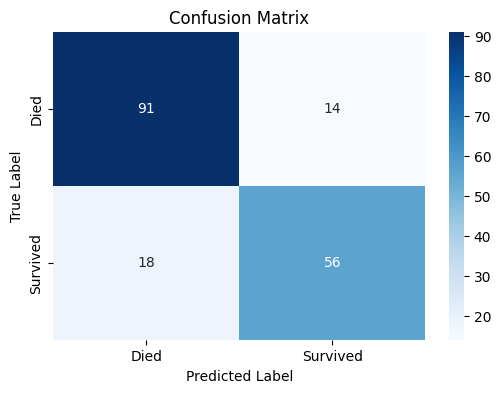


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [18]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_temporary_train, y_temporary_train)


y_validation_pred = model.predict(X_validation)


print("Accuracy on Validation Set:", accuracy_score(y_validation, y_validation_pred))


conf_matrix = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


print("\nClassification Report:")
print(classification_report(y_validation, y_validation_pred))


## Hyperparameter Tuning
In this section, we will optimize the Logistic Regression model by testing different hyperparameters.

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_temporary_train, y_temporary_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7962966610853935


In [20]:
best_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
best_model.fit(X_temporary_train, y_temporary_train)
y_validation_pred = best_model.predict(X_validation)
print("Accuracy on Validation Set with Best Parameters:", accuracy_score(y_validation, y_validation_pred))


Accuracy on Validation Set with Best Parameters: 0.8100558659217877


### Evaluating the Best Model
The model is retrained using the best parameters obtained from GridSearchCV, and its performance is evaluated on the validation set. Below, we compute the accuracy, visualize the confusion matrix, and plot the Precision-Recall Curve.


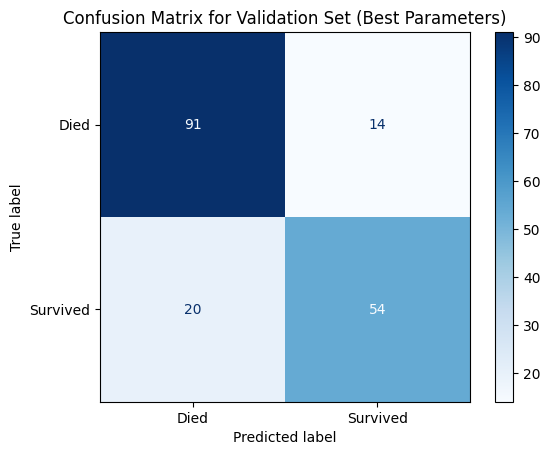

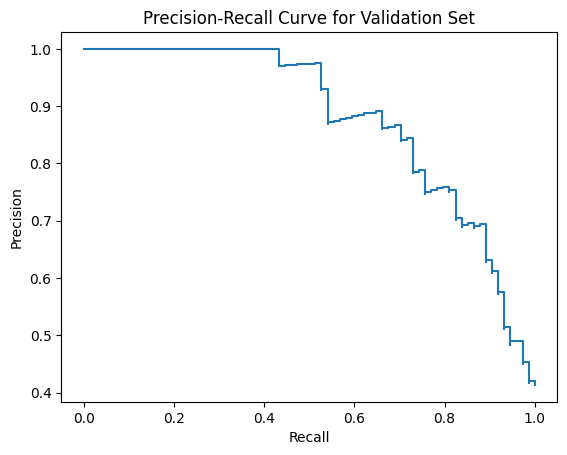

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_validation, y_validation_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Died', 'Survived']).plot(cmap='Blues')
plt.title("Confusion Matrix for Validation Set (Best Parameters)")
plt.show()


from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

y_probs = best_model.predict_proba(X_validation)[:, 1]  # Get probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_validation, y_probs)

PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title("Precision-Recall Curve for Validation Set")
plt.show()


### Final Thoughts

This project extended our work in machine learning, building upon the foundation established in previous tasks and expanding our understanding of key concepts.

#### What Worked
- The removal of irrelevant and highly correlated features improved the model’s generalization and overall performance.
- Logistic Regression delivered consistent and solid results after thoughtful feature engineering and data standardization.
- Hyperparameter tuning allowed for optimization, leading to better validation accuracy and a more robust model.

#### What Didn’t Work as Well
- Despite the model's overall success, the validation set accuracy highlighted potential overfitting, suggesting the need for further refinement.
- Limited experimentation with alternative models left opportunities for performance improvement unexplored.

#### Conclusion
Overall, this project provided valuable insights into machine learning workflows, reinforced our understanding of model evaluation, and strengthened our problem-solving skills. Moving forward, we aim to explore more advanced models and techniques to address the challenges identified and continue advancing our expertise in the field.


## References
- 
- 